##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [4]:
%pip install pandas
%pip install matplotlib
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd

# Helper libraries
import numpy as np


print(tf.__version__)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


2022-09-14 14:15:43.908425: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 14:15:44.777652: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-09-14 14:15:45.135499: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-14 14:15:53.599231: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

2.10.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [5]:
mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [6]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

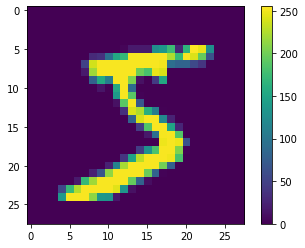

In [14]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

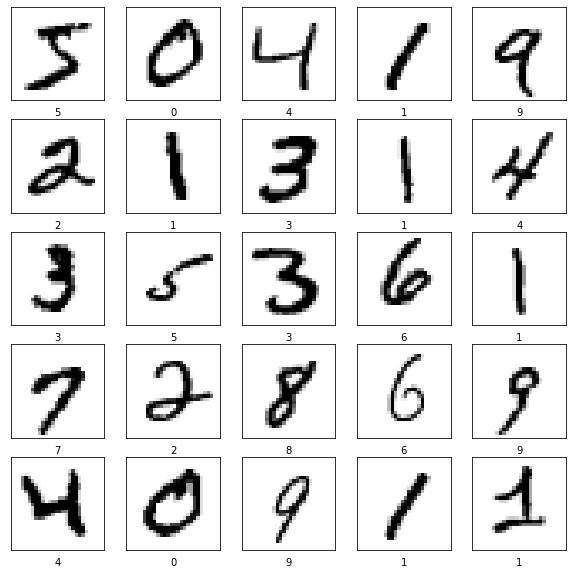

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
df = pd.DataFrame()
df['neurons'] =''
df['test_accuracy']=''
#df['train_accuracy']=''
df

,neurons,test_accuracy


## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
neurons = 1
for n in range(14):
    neurons = neurons*2
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(neurons, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    model.fit(train_images, train_labels, epochs=10)

    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

    print('\nTest accuracy:', test_acc, 'neurons ' , neurons)
    df = df.append({'neurons' : neurons, 'test_accuracy' : test_acc},
        ignore_index = True)
df.to_csv('layer1.csv', encoding='utf-8', index=False)

In [21]:
df

,neurons,test_accuracy
0,2.0,0.6347
1,4.0,0.8708
2,8.0,0.9271
3,16.0,0.9530
4,32.0,0.9681
5,64.0,0.9753
6,128.0,0.9765
7,256.0,0.9794
8,512.0,0.9816
9,1024.0,0.9811


In [14]:
df1 = pd.DataFrame()
df1['neu'] =''
df1['neurons'] =''
df1['test_accuracy']=''
#df['train_accuracy']=''
df1

,neu,neurons,test_accuracy


In [ ]:

neu=1
for a in range(12):
    neu = neu*2
    neurons = 1
    for n in range(12):
      neurons = neurons*2
      model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(neu, activation='relu'),
          tf.keras.layers.Dense(neurons, activation='relu'),
          tf.keras.layers.Dense(10)
      ])

      model.compile(optimizer='adam',
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

      model.fit(train_images, train_labels, epochs=10)

      test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

      print('\nTest accuracy:', test_acc,'neu', neu , 'neurons ' , neurons)
      df1 = df1.append({'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},
          ignore_index = True)

df1.to_csv('layer2.csv', encoding='utf-8', index=False)

In [28]:

df2 = pd.DataFrame()
df2['ne'] =''
df2['neu'] =''
df2['neurons'] =''
df2['test_accuracy']=''
#df['train_accuracy']=''
df2
#df2.to_csv('layer3one.csv', mode='a', index=False, encoding='utf-8')

,ne,neu,neurons,test_accuracy


In [ ]:
ne=4096
for b in range(11):
    ne = ne*2
    neu=1
    for a in range(11):
        neu = neu*2
        neurons = 1
        for n in range(11):
          neurons = neurons*2
          model = tf.keras.Sequential([
              tf.keras.layers.Flatten(input_shape=(28, 28)),
              tf.keras.layers.Dense(ne, activation='relu'),
              tf.keras.layers.Dense(neu, activation='relu'),
              tf.keras.layers.Dense(neurons, activation='relu'),
              tf.keras.layers.Dense(10)
          ])

          model.compile(optimizer='adam',
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])

          model.fit(train_images, train_labels, epochs=10, verbose=0)

          test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=0)

          print('\nTest accuracy:', test_acc, 'ne' , ne, 'neu', neu , 'neurons ' , neurons)
          df2 = df2[0:0]
          df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},
              ignore_index = True)
          df2.to_csv('layer3two.csv', mode='a', index=False, encoding='utf-8', header =False)


Test accuracy: 0.4666000008583069 ne 8192 neu 2 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9549999833106995 ne 8192 neu 2 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.4837999939918518 ne 8192 neu 2 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9542999863624573 ne 8192 neu 2 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9564999938011169 ne 8192 neu 2 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9613000154495239 ne 8192 neu 2 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9573000073432922 ne 8192 neu 2 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.957099974155426 ne 8192 neu 2 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9611999988555908 ne 8192 neu 2 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9638000130653381 ne 8192 neu 2 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9553999900817871 ne 8192 neu 2 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9635999798774719 ne 8192 neu 4 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9635000228881836 ne 8192 neu 4 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9740999937057495 ne 8192 neu 4 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9661999940872192 ne 8192 neu 4 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9768999814987183 ne 8192 neu 4 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.974399983882904 ne 8192 neu 4 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9726999998092651 ne 8192 neu 4 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9685999751091003 ne 8192 neu 4 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9731000065803528 ne 8192 neu 4 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9747999906539917 ne 8192 neu 4 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.973800003528595 ne 8192 neu 4 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 8 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9772999882698059 ne 8192 neu 8 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9797999858856201 ne 8192 neu 8 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9736999869346619 ne 8192 neu 8 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9754999876022339 ne 8192 neu 8 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9797000288963318 ne 8192 neu 8 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782999753952026 ne 8192 neu 8 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9758999943733215 ne 8192 neu 8 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.98089998960495 ne 8192 neu 8 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9785000085830688 ne 8192 neu 8 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9794999957084656 ne 8192 neu 8 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9585999846458435 ne 8192 neu 16 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9787999987602234 ne 8192 neu 16 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9801999926567078 ne 8192 neu 16 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9735000133514404 ne 8192 neu 16 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782000184059143 ne 8192 neu 16 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.98089998960495 ne 8192 neu 16 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9835000038146973 ne 8192 neu 16 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9821000099182129 ne 8192 neu 16 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.980400025844574 ne 8192 neu 16 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9810000061988831 ne 8192 neu 16 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9768000245094299 ne 8192 neu 16 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.96670001745224 ne 8192 neu 32 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9760000109672546 ne 8192 neu 32 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9746999740600586 ne 8192 neu 32 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9796000123023987 ne 8192 neu 32 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782999753952026 ne 8192 neu 32 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9769999980926514 ne 8192 neu 32 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 32 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9829000234603882 ne 8192 neu 32 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9789000153541565 ne 8192 neu 32 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9743000268936157 ne 8192 neu 32 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9800999760627747 ne 8192 neu 32 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 64 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9810000061988831 ne 8192 neu 64 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9840999841690063 ne 8192 neu 64 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9778000116348267 ne 8192 neu 64 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9822999835014343 ne 8192 neu 64 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.982699990272522 ne 8192 neu 64 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 64 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818999767303467 ne 8192 neu 64 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 64 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782999753952026 ne 8192 neu 64 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9793999791145325 ne 8192 neu 64 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 128 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9760000109672546 ne 8192 neu 128 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.979200005531311 ne 8192 neu 128 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 128 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811000227928162 ne 8192 neu 128 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 128 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 128 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 128 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9783999919891357 ne 8192 neu 128 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9750999808311462 ne 8192 neu 128 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811000227928162 ne 8192 neu 128 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.6384999752044678 ne 8192 neu 256 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9781000018119812 ne 8192 neu 256 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9829999804496765 ne 8192 neu 256 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818999767303467 ne 8192 neu 256 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9789999723434448 ne 8192 neu 256 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 256 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9801999926567078 ne 8192 neu 256 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9819999933242798 ne 8192 neu 256 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9771000146865845 ne 8192 neu 256 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782000184059143 ne 8192 neu 256 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9815000295639038 ne 8192 neu 256 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 512 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 512 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.98089998960495 ne 8192 neu 512 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9779999852180481 ne 8192 neu 512 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.983299970626831 ne 8192 neu 512 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.982200026512146 ne 8192 neu 512 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818000197410583 ne 8192 neu 512 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9800999760627747 ne 8192 neu 512 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 512 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.977400004863739 ne 8192 neu 512 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.982699990272522 ne 8192 neu 512 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9635000228881836 ne 8192 neu 1024 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9821000099182129 ne 8192 neu 1024 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9797000288963318 ne 8192 neu 1024 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 8192 neu 1024 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.982200026512146 ne 8192 neu 1024 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9751999974250793 ne 8192 neu 1024 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.98089998960495 ne 8192 neu 1024 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 1024 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9786999821662903 ne 8192 neu 1024 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9800999760627747 ne 8192 neu 1024 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9822999835014343 ne 8192 neu 1024 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 2048 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 8192 neu 2048 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9810000061988831 ne 8192 neu 2048 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9835000038146973 ne 8192 neu 2048 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9750999808311462 ne 8192 neu 2048 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9821000099182129 ne 8192 neu 2048 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782999753952026 ne 8192 neu 2048 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782000184059143 ne 8192 neu 2048 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9789999723434448 ne 8192 neu 2048 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9800000190734863 ne 8192 neu 2048 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9805999994277954 ne 8192 neu 2048 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 16384 neu 2 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.8691999912261963 ne 16384 neu 2 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 16384 neu 2 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9577999711036682 ne 16384 neu 2 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9555000066757202 ne 16384 neu 2 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9587000012397766 ne 16384 neu 2 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9577999711036682 ne 16384 neu 2 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9642999768257141 ne 16384 neu 2 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.4074999988079071 ne 16384 neu 2 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.6492999792098999 ne 16384 neu 2 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.6424000263214111 ne 16384 neu 2 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 16384 neu 4 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9652000069618225 ne 16384 neu 4 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9703999757766724 ne 16384 neu 4 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9715999960899353 ne 16384 neu 4 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9667999744415283 ne 16384 neu 4 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9729999899864197 ne 16384 neu 4 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9743000268936157 ne 16384 neu 4 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9728000164031982 ne 16384 neu 4 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9696999788284302 ne 16384 neu 4 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9711999893188477 ne 16384 neu 4 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9771999716758728 ne 16384 neu 4 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9598000049591064 ne 16384 neu 8 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9595999717712402 ne 16384 neu 8 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9764999747276306 ne 16384 neu 8 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9830999970436096 ne 16384 neu 8 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9745000004768372 ne 16384 neu 8 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9761999845504761 ne 16384 neu 8 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.978600025177002 ne 16384 neu 8 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9790999889373779 ne 16384 neu 8 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9781000018119812 ne 16384 neu 8 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9782000184059143 ne 16384 neu 8 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9763000011444092 ne 16384 neu 8 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.8708000183105469 ne 16384 neu 16 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9786999821662903 ne 16384 neu 16 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9797999858856201 ne 16384 neu 16 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811000227928162 ne 16384 neu 16 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9812999963760376 ne 16384 neu 16 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818999767303467 ne 16384 neu 16 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9824000000953674 ne 16384 neu 16 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9828000068664551 ne 16384 neu 16 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9779000282287598 ne 16384 neu 16 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9757999777793884 ne 16384 neu 16 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9803000092506409 ne 16384 neu 16 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.869700014591217 ne 16384 neu 32 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9761000275611877 ne 16384 neu 32 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9807000160217285 ne 16384 neu 32 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9781000018119812 ne 16384 neu 32 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.975600004196167 ne 16384 neu 32 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9807999730110168 ne 16384 neu 32 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9794999957084656 ne 16384 neu 32 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9783999919891357 ne 16384 neu 32 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 16384 neu 32 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9812999963760376 ne 16384 neu 32 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9821000099182129 ne 16384 neu 32 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9632999897003174 ne 16384 neu 64 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9832000136375427 ne 16384 neu 64 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.979200005531311 ne 16384 neu 64 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9807999730110168 ne 16384 neu 64 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9810000061988831 ne 16384 neu 64 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9830999970436096 ne 16384 neu 64 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9824000000953674 ne 16384 neu 64 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9847999811172485 ne 16384 neu 64 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9787999987602234 ne 16384 neu 64 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9776999950408936 ne 16384 neu 64 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9811999797821045 ne 16384 neu 64 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 16384 neu 128 neurons  2


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.11349999904632568 ne 16384 neu 128 neurons  4


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.98089998960495 ne 16384 neu 128 neurons  8


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818999767303467 ne 16384 neu 128 neurons  16


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9821000099182129 ne 16384 neu 128 neurons  32


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9814000129699707 ne 16384 neu 128 neurons  64


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9800000190734863 ne 16384 neu 128 neurons  128


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9810000061988831 ne 16384 neu 128 neurons  256


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9797000288963318 ne 16384 neu 128 neurons  512


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9815000295639038 ne 16384 neu 128 neurons  1024


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},



Test accuracy: 0.9818000197410583 ne 16384 neu 128 neurons  2048


/tmp/ipykernel_237372/2269793354.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'ne': ne, 'neu': neu, 'neurons' : neurons, 'test_accuracy' : test_acc},


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

And the model predicts a label as expected.